In [46]:
import pandas as pan
import seaborn as sea
import matplotlib.pyplot as plt

In [189]:
mpg = sea.load_dataset("mpg", cache=True, data_home=None)

In [42]:
#Dataset used:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


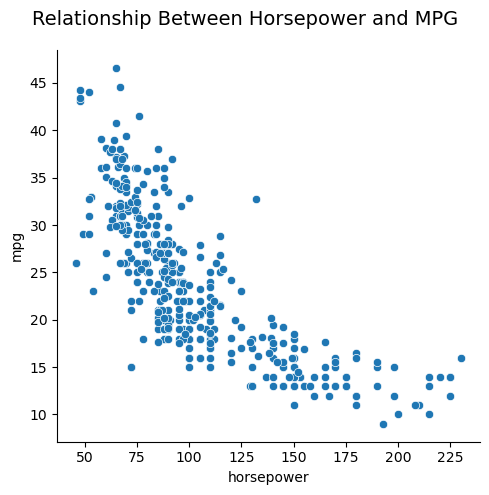

In [88]:
#Relationship between Fuel Economy (MPG) and Horse Power:
horsempg = sea.relplot(data=mpg, x="horsepower", y="mpg")
horsempg.fig.suptitle("Relationship Between Horsepower and MPG", fontsize=14)
horsempg.fig.tight_layout()
horsempg.fig.subplots_adjust(top=0.9)  # Adjust space for title
plt.show()

#SUMMARY: The relationship between horsepower and Fuel Economy (MPG) is shown below.
#Essentially, the more horsepower a vehciles produces, the less MPG and vice versa.
#A basic reasoning for this is for the larger, more powerful an engine is, it must be compensated with less MPG. 

In [414]:
#Fuel economy by country of origin:
MPGcountry = mpg.groupby(by="origin")["mpg"].mean().reset_index()
MPGcountry.columns = ["Origin", "Avg MPG"]
MPGcountry

#SUMMARY: Below is the avergae MPG for each country in the dataset. 
#Japan leads the way, they are known for their simple designs, yet highly-functional
#and fuel-efficient designs. Europe comes next because of their love for sedans, which are
#generally more fuel-efficient than larger cars. USA comes in last, possibly because of their love trucks
#and SUVs. 

,Origin,Avg MPG
0,europe,27.891429
1,japan,30.450633
2,usa,20.083534


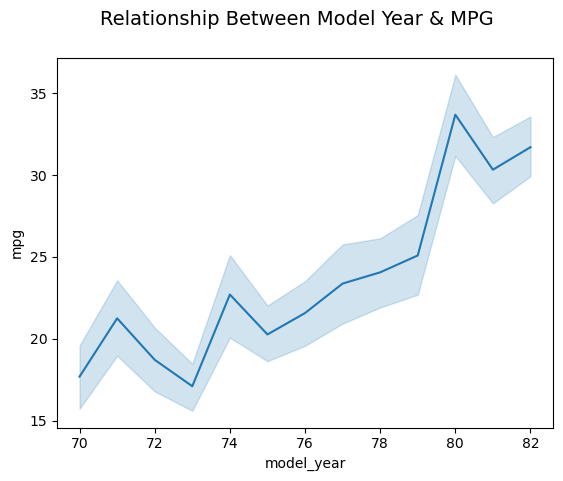

In [249]:
#Relationship between model year and MPG:
modelyearmpg = sea.lineplot(data=mpg, x="model_year", y="mpg")
plt.suptitle("Relationship Between Model Year & MPG", fontsize=14)
plt.show()
#The relationship between model year and MPG is a steady increase of MPG following the increasing model year. 
#With new technology such more fuel-efficient engines, gasoline, and oil coming out, you see a natural increase in MPG over the years.

In [418]:
#Comparison between vehicles for customers: 
Manumpg = mpg.groupby(by="name").agg({"model_year": "mean", "mpg": "mean", "cylinders" : "mean"}).head(10).reset_index()
Manumpg.columns=["Make/Model","Prod. Year", "Avg MPG", "Cynlinders"]
Manumpg

#Below is a comparison I did on what consumers would look for when buying a vehcile. 
#the table below easily shows all the information. *Number can be changed to view more rows.*

,Make/Model,Prod. Year,Avg MPG,Cynlinders
0,amc ambassador brougham,73.00,13.000,8.0
1,amc ambassador dpl,70.00,15.000,8.0
2,amc ambassador sst,72.00,17.000,8.0
3,amc concord,79.00,21.850,5.0
4,amc concord d/l,78.00,18.100,6.0
5,amc concord dl,82.00,23.000,4.0
6,amc concord dl 6,79.00,20.200,6.0
7,amc gremlin,72.25,19.500,6.0
8,amc hornet,73.25,19.375,6.0
9,amc hornet sportabout (sw),71.00,18.000,6.0


In [454]:
#Comparing which manufacturers have the best avg MPG:
mpg["manufacturer"] = mpg["manufacturer"].replace({"vw": "volkswagen", "vokswagen": "volkswagen"})
Manuavgmpg = mpg.groupby(by="manufacturer").agg({"mpg": "mean"}).head(100).reset_index().sort_values(by="mpg", ascending=False)
Manuavgmpg.columns=["Manufacturer", "Avg MPG"]
Manuavgmpg

#SUMMARY: Below is a comparison of which manu has the highest avg MPG. This is sorted from highest to lowest (ascending).
#NOTE:VW, Vokswagen, and Volkswagen have been merged and replace by Volkswagen. 

,Manufacturer,Avg MPG
21,nissan,36.000000
32,triumph,35.000000
15,honda,33.761538
27,renault,32.880000
33,volkswagen,31.840909
10,datsun,31.113043
17,mazda,30.860000
29,subaru,30.525000
12,fiat,28.912500
30,toyota,28.372000
